In [1]:
#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [3]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
#I will use Train 20% data for model building and 80% for Testing
#Test df will be used for Predicting values and submitting in Kaggle

In [4]:
train.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

In [6]:
train.head()

#There is Pixels information for each label - 28x28 grid will give 784 entries

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


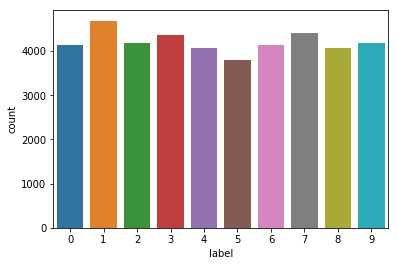

In [9]:
sns.countplot(train['label'])
#All the 10 Classes are distributed across all labels

In [10]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [11]:
train.isnull().sum().sum()
#No Null values

0

In [12]:
train.drop_duplicates(inplace=True)

In [13]:
len(train.index)

42000

In [14]:
X = train.drop(['label'], axis=1)
y = train['label']

#Creating X and y frame

In [15]:
from sklearn.preprocessing import scale

X = scale(X)

C:\Users\Kavita Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 4)
#Taking 20% data for model training as data size is too big. 8400 records will be used for Training the model

In [17]:
print(y_train.mean())
print(y_test.mean())
#Mean value is similar, data is separated properly, not skewed

4.453333333333333
4.4574702380952385


In [18]:
#Starting up with Linear SVM model

In [19]:
model = SVC(C = 1)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [20]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[3161,    0,   11,    6,    7,   11,   27,   12,   19,    1],
       [   0, 3691,   16,   11,    4,    5,    7,   15,   11,    4],
       [  15,   17, 3113,   33,   30,    6,   24,   82,   43,    6],
       [   6,   10,   67, 3144,    3,   88,    5,   89,   51,   20],
       [   1,    9,   29,    2, 3083,   10,   14,   29,   10,   65],
       [  10,   21,   18,   82,   19, 2771,   43,   35,   30,   28],
       [  20,    7,    6,    0,   16,   32, 3195,   18,   16,    0],
       [   9,   22,   27,    5,   32,    5,    0, 3317,    3,  106],
       [  11,   37,   30,   58,   20,   50,   16,   32, 2981,   36],
       [  15,    7,   15,   38,   82,    7,    0,  110,   21, 3018]],
      dtype=int64)

In [21]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average='micro' ))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred, average='micro'))

accuracy 0.9367261904761904
precision 0.9367261904761904
recall 0.9367261904761904


In [22]:
#Trying out with K fold Cross Validation
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [23]:
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

# K Cross Cross validation with 5 folds

In [24]:
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))
#All the different folds are having >92% accuracy

[0.9327381  0.93333333 0.92678571 0.94107143 0.9327381 ]
mean accuracy = 0.9333333333333332


In [25]:
#Using Grid search to find optimum hyperparameter C

# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True,
                       n_jobs=-1) 

#GridSearchCV is running with 5 differnt values and 5 folds thus 25 fits

In [26]:
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [27]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,218.893742,17.467778,48.433109,6.127855,0.1,{'C': 0.1},0.873810,0.866667,0.870833,0.876786,...,0.868571,0.007673,5,0.883929,0.884375,0.887202,0.884077,0.885714,0.885060,0.001244
1,108.306829,5.883715,30.911999,3.608398,1,{'C': 1},0.932738,0.933333,0.926786,0.941071,...,0.933333,0.004549,4,0.976935,0.977827,0.979018,0.978423,0.979613,0.978363,0.000930
2,94.472797,3.454484,26.961872,1.310659,10,{'C': 10},0.944643,0.938095,0.939286,0.942857,...,0.940833,0.002486,1,0.999554,0.999851,0.999554,0.999554,0.999256,0.999554,0.000188
3,95.052660,4.049962,26.835293,2.444651,100,{'C': 100},0.945238,0.937500,0.938690,0.941667,...,0.940357,0.002802,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,89.816476,5.147147,24.092551,0.579383,1000,{'C': 1000},0.945238,0.937500,0.938690,0.941667,...,0.940357,0.002802,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


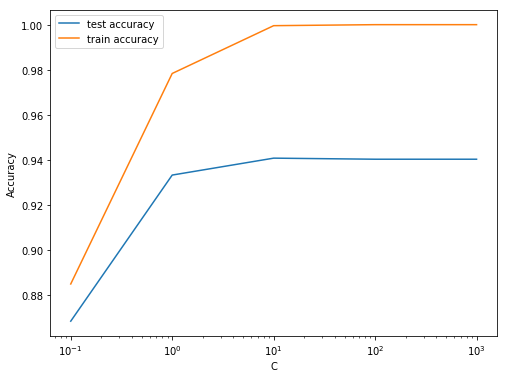

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

#Test results are best at C=10

In [29]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

#Linear model is giving us 94.08% accuracy with C=10

 The highest test accuracy is 0.9408333333333333 at C = 10


In [30]:
##### Building Non-Linear Model - checking non-Linear model now to find which model works better Linear or non-Linear

In [31]:
model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
# confusion matrix
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[3161,    0,   11,    6,    7,   11,   27,   12,   19,    1],
       [   0, 3691,   16,   11,    4,    5,    7,   15,   11,    4],
       [  15,   17, 3113,   33,   30,    6,   24,   82,   43,    6],
       [   6,   10,   67, 3144,    3,   88,    5,   89,   51,   20],
       [   1,    9,   29,    2, 3083,   10,   14,   29,   10,   65],
       [  10,   21,   18,   82,   19, 2771,   43,   35,   30,   28],
       [  20,    7,    6,    0,   16,   32, 3195,   18,   16,    0],
       [   9,   22,   27,    5,   32,    5,    0, 3317,    3,  106],
       [  11,   37,   30,   58,   20,   50,   16,   32, 2981,   36],
       [  15,    7,   15,   38,   82,    7,    0,  110,   21, 3018]],
      dtype=int64)

In [33]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred, average='micro'))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred, average='micro'))

#Non linear model with rbf kernel and C=1 gives accuracy of 93.67%

accuracy 0.9367261904761904
precision 0.9367261904761904
recall 0.9367261904761904


In [34]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
#Applying GridSearchCV to find the optimum values of Hyperparameters C and gamma

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      

# fit the model
model_cv.fit(X_train, y_train)                  

#GridSearchCV is now being done with 3 gamma values, 4 C values and 5 folds --> 60 fits

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 24.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

#More understanding on 10 class classification problem

If you check the SVM.SVC documentation then decision_function_shape by default is ovr which is one Vs Rest, which says that if there are multiple classes then classes are evaluated as one class Vs all other classes. 

decision_function_shape : ‘ovo’, ‘ovr’, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.

Changed in version 0.19: decision_function_shape is ‘ovr’ by default.

In [35]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,231.937579,14.786311,26.869935,1.708651,1,0.01,"{'C': 1, 'gamma': 0.01}",0.749405,0.751190,0.742262,...,0.744405,0.017106,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,56.070913,3.536274,16.053553,1.455757,1,0.001,"{'C': 1, 'gamma': 0.001}",0.934524,0.932143,0.924405,...,0.932381,0.005742,4,0.971429,0.972321,0.972917,0.971577,0.973214,0.972292,0.000707
2,75.456545,6.719533,18.415511,2.022989,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.898810,0.905952,0.898810,...,0.900595,0.003194,8,0.913988,0.916071,0.919345,0.915030,0.916964,0.916280,0.001829
3,258.326635,28.492987,29.034281,1.619292,10,0.01,"{'C': 10, 'gamma': 0.01}",0.771429,0.765476,0.761310,...,0.764286,0.015735,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,41.310211,1.758964,13.420271,0.668309,10,0.001,"{'C': 10, 'gamma': 0.001}",0.946429,0.939286,0.938095,...,0.941190,0.003417,1,0.999107,0.998661,0.998363,0.998958,0.998661,0.998750,0.000259


In [36]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

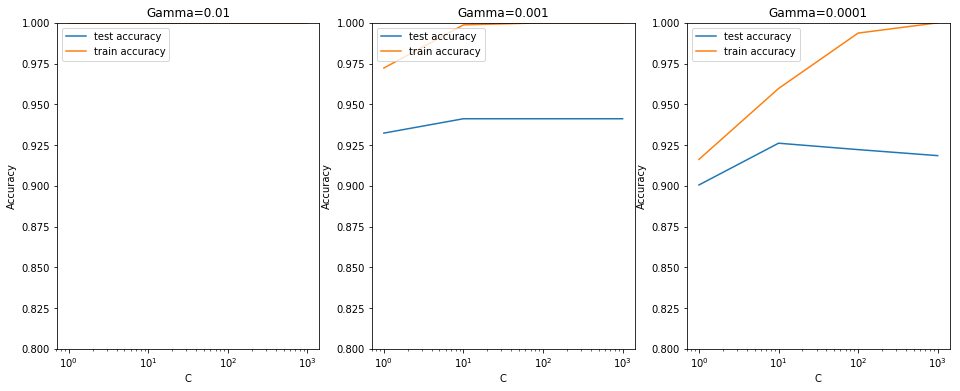

In [37]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

#Gamma=0.001 and C=10 gives best result

In [38]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9411904761904762 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [39]:
#Building the final model
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.001, "kernel":"rbf"}

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred, average='micro'))
print("precision - all classes :", metrics.precision_score(y_test, y_pred, average=None))

print("sensitivity/recall", metrics.recall_score(y_test, y_pred, average='micro'))
print("sensitivity/recall - all classes:", metrics.recall_score(y_test, y_pred, average=None))

#Model is giving 94.65% accuracy

[[3176    0   16    4   10    7   27    1   13    1]
 [   1 3702   14   10    2    1   10   10    8    6]
 [  18   15 3162   23   24    5   58   26   30    8]
 [   9    2   57 3202    5   63   26   50   44   25]
 [   1   11   24    3 3105    8   16   21    7   56]
 [   9   13   16   66    8 2848   51    5   23   18]
 [  27    4   11    0   18   23 3215    0   12    0]
 [   5   18   31    5   36    6   21 3333    1   70]
 [  12   33   32   51   24   56   30   19 2982   32]
 [  13    7   11   26   61    8   19   74   14 3080]] 

accuracy 0.946577380952381
precision 0.946577380952381
precision - all classes : [0.97095689 0.97293035 0.93716657 0.94454277 0.9429092  0.9414876
 0.92571264 0.94179147 0.95149968 0.93446602]
sensitivity/recall 0.946577380952381
sensitivity/recall - all classes: [0.97572965 0.98352816 0.93855744 0.91932242 0.95479705 0.93163232
 0.97129909 0.94526375 0.91164781 0.92967099]


In [40]:

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.98      0.97      3255
     class 1       0.97      0.98      0.98      3764
     class 2       0.94      0.94      0.94      3369
     class 3       0.94      0.92      0.93      3483
     class 4       0.94      0.95      0.95      3252
     class 5       0.94      0.93      0.94      3057
     class 6       0.93      0.97      0.95      3310
     class 7       0.94      0.95      0.94      3526
     class 8       0.95      0.91      0.93      3271
     class 9       0.93      0.93      0.93      3313

   micro avg       0.95      0.95      0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



In [41]:
df = pd.DataFrame(classification_report(y_test, y_pred, target_names=target_names,output_dict=True)).transpose()
df
#Precision & Recall are above 90% for all 10 classes

,f1-score,precision,recall,support
class 0,0.973337,0.970957,0.975730,3255.0
class 1,0.978201,0.972930,0.983528,3764.0
class 2,0.937861,0.937167,0.938557,3369.0
class 3,0.931762,0.944543,0.919322,3483.0
class 4,0.948816,0.942909,0.954797,3252.0
class 5,0.936534,0.941488,0.931632,3057.0
class 6,0.947958,0.925713,0.971299,3310.0
class 7,0.943524,0.941791,0.945264,3526.0
class 8,0.931148,0.951500,0.911648,3271.0
class 9,0.932062,0.934466,0.929671,3313.0


In [42]:
#Now running on Actual test.csv for Kaggle submission
test.head()
test.shape
model

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
#Building the final model
# specify optimal hyperparameters
test = scale(test)
y_pred = model.predict(test)

C:\Users\Kavita Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
y_pred.shape
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [45]:
submission = pd.DataFrame({"ImageId": range(1,28001),"Label": y_pred})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2


In [46]:
submission.shape

(28000, 2)

In [47]:
submission.to_csv('./submission.csv',index=False)

#Kaggle score with this submission - 0.946 Date 17-July-19

28000


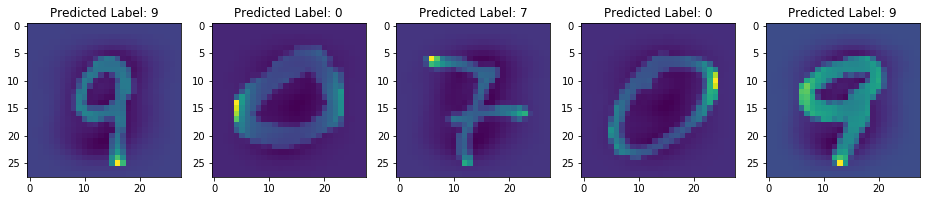

In [48]:
# visualizing Final Model on Test Dataset

a = np.random.randint(1,y_pred.shape[0]+1,5)
print(y_pred.shape[0])
plt.figure(figsize=(16,4))
for k,v in enumerate(a):
    #print(k,v)
    plt.subplot(150+k+1)
    _2d = test[v].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[v]}')
    plt.imshow(_2d)
plt.show()

- Used 20% of the Train data for model training, 80% was used for Testing the model
- SVM non linear kernel is selected - "C": 10, "gamma": 0.001, "kernel":"rbf" are the final hyperparamaters for the model
- Kaggle submission was done and it scored 0.946